In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.6675 - acc: 0.8289 - val_loss: 0.3358 - val_acc: 0.9097
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.3075 - acc: 0.9129 - val_loss: 0.2579 - val_acc: 0.9279
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2481 - acc: 0.9298 - val_loss: 0.2161 - val_acc: 0.9389
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2127 - acc: 0.9398 - val_loss: 0.1879 - val_acc: 0.9468
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1875 - acc: 0.9466 - val_loss: 0.1677 - val_acc: 0.9529
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1679 - acc: 0.9524 - val_loss: 0.1520 - val_acc: 0.9581
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - 

In [0]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 8s 842us/step
Test loss 0.1105, accuracy 96.85%


Text(0, 0.5, 'acc')

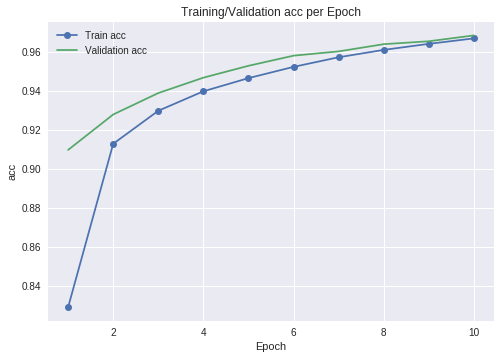

In [0]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

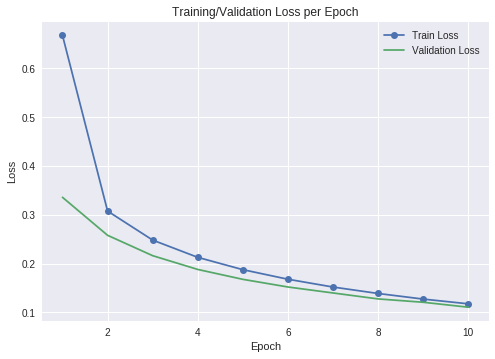

In [0]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [0]:
#Credit: https://engmrk.com/lenet-5-a-classic-cnn-architecture/